1. Install and Import Dependencies

In [1]:
!python --version

Python 3.11.4


In [3]:
!pip install torch torchvision torchaudio


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [9]:
!cd yolov5 & pip install -r requirements.txt

                                              0.0/190.6 kB ? eta -:--:--
     -----                                 30.7/190.6 kB 660.6 kB/s eta 0:00:01
     -------                               41.0/190.6 kB 326.8 kB/s eta 0:00:01
     -----------------                     92.2/190.6 kB 581.0 kB/s eta 0:00:01
     -----------------                     92.2/190.6 kB 581.0 kB/s eta 0:00:01
     ------------------------------       163.8/190.6 kB 656.4 kB/s eta 0:00:01
     ------------------------------       163.8/190.6 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 190.6/190.6 kB 578.0 kB/s eta 0:00:00
                                              0.0/7.6 MB ? eta -:--:--
                                              0.1/7.6 MB 2.4 MB/s eta 0:00:04
                                              0.1/7.6 MB 2.4 MB/s eta 0:00:04
     -                                        0.2/7.6 MB 1.4 MB/s eta 0:00:06
     --                                       0.4/7.6 MB 2.0 M


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

Matplotlib is building the font cache; this may take a moment.


2. Load Model

In [11]:
model=torch.hub.load('ultralytics/yolov5','yolov5s')

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\KIIT/.cache\torch\hub\master.zip
YOLOv5  2023-12-13 Python-3.11.4 torch-2.1.1+cpu CPU

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:05<00:00, 2.71MB/s]

Fusing layers... 
YOLOv5s summary:

In [12]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [13]:
img = 'https://ultralytics.com/images/zidane.jpg'
results=model(img)
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 720x1280 2 persons, 2 ties
Speed: 2069.5ms pre-process, 254.0ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)

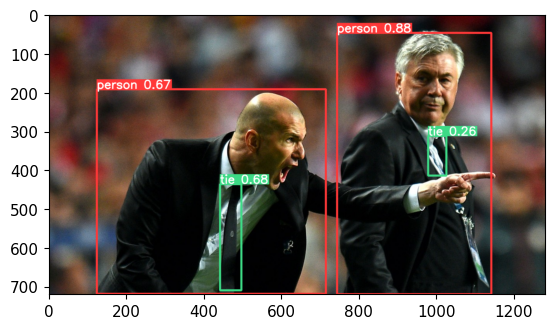

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
results.xyxy

[tensor([[7.43290e+02, 4.83437e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

In [16]:
np.array(results.render()).shape

(1, 720, 1280, 3)

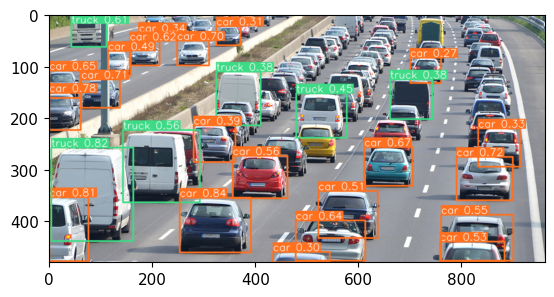

In [17]:
img1='https://www.iii.org/sites/default/files/p_cars_highway_522785736.jpg'
results1=model(img1)
plt.imshow(np.squeeze(results1.render()))

In [18]:
results1.print()

image 1/1: 480x962 21 cars, 6 trucks
Speed: 1524.8ms pre-process, 186.0ms inference, 2.0ms NMS per image at shape (1, 3, 320, 640)


 4. Real Time Detections

In [35]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()

    ##Make Detections
    results=model(frame)

    cv2.imshow('YOLO',np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

5. Train from Scrtach

In [21]:
import uuid
import os
import time

In [24]:
IMAGES_PATH=os.path.join('data','images') #/data/images
labels=['awake','drowsy']
number_imgs=20

In [26]:
cap=cv2.VideoCapture(0)
#loop through labels
for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(5)

    #Loop through images
    for img_num in range(number_imgs):
        print(f'Collecting images for {label}, image number {img_num}')

        #webcam feed
        ret,frame=cap.read()

        #Naming out image path
        imgname=os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')

        #Writes out image to file
        cv2.imwrite(imgname,frame)

        #Render to the screen
        cv2.imshow('Image Collection',frame)

        # 2 second delay between captures
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


In [23]:
for label in labels:
    print(label)

awake
drowsy


In [27]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [29]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-249-gf400bba Python-3.11.4 torch-2.1.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, 

6. Load Model

In [5]:
import torch
model=torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp6/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\KIIT/.cache\torch\hub\master.zip
YOLOv5  2023-12-14 Python-3.11.4 torch-2.1.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [12]:
import os
img=os.path.join('data','images','awake.d691aa69-99b5-11ee-a039-eed312addfc5.jpg')

In [13]:
results=model(img)

In [14]:
results.print()

image 1/1: 480x640 1 awake
Speed: 29.0ms pre-process, 253.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


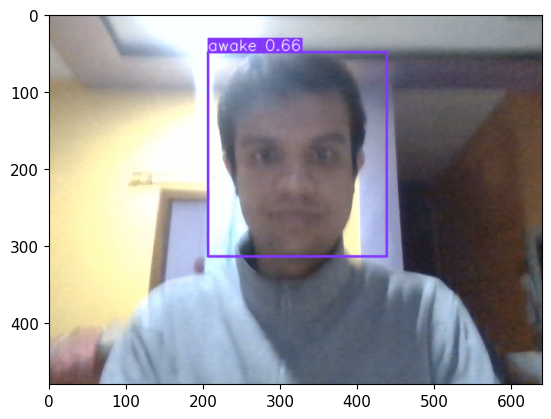

In [15]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [17]:
import cv2
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()

    ##Make Detections
    results=model(frame)

    cv2.imshow('YOLO',np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()